In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import missingno as msno
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
data_train=pd.read_csv("train_house.csv")
data_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
le =LabelEncoder()
columns_to_encode =["Alley","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope",
           "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","MasVnrType","LotShape","ExterQual",
           "ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC",
           "CentralAir","Electrical","KitchenQual","Functional","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","SaleCondition","SaleType","FireplaceQu","PoolQC","Fence","MiscFeature",
                    "Exterior1st","Exterior2nd"]
for column in columns_to_encode:
    data_train[column] = le.fit_transform(data_train[column])


In [18]:
data_train.fillna(0,inplace=True)
data_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [19]:
correlation_matrix = data_train.corr()
threshold = 0.5
selected_features = correlation_matrix[correlation_matrix['SalePrice'].abs() > threshold]['SalePrice']
print("Selected features based on correlation with target:", selected_features.index.tolist())

Selected features based on correlation with target: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice']


In [20]:
## defining X and Y
X=np.array(data_train[["OverallQual","YearBuilt","YearRemodAdd","ExterQual","BsmtQual","TotalBsmtSF",
                             "1stFlrSF","GrLivArea","FullBath","KitchenQual","TotRmsAbvGrd","GarageFinish","GarageCars",
                             "GarageArea"]])
Y=np.array(data_train[["SalePrice"]])

In [41]:
##definig X_tarin & X_val and Y_train & Y_val
X_train, X_eval, Y_train, Y_eval = train_test_split(X, Y, test_size=0.2)

In [43]:
## creating  the model
model=tf.keras.models.Sequential([
tf.keras.layers.Dense(14,activation="selu") ,                  ##input layer
tf.keras.layers.Dense(65,activation="PReLU"),          ##hiddenlayer 1
tf.keras.layers.Dense(35,activation="ELU"),          ##hidden layer2
                                   tf.keras.layers.Dense(1,activation="linear"),          #output layer
])

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mae')


In [45]:
output=model.fit(X_train,Y_train,epochs=600)


Epoch 1/600
37/37 [==============================] - 1s 1ms/step - loss: 182516.1250
Epoch 2/600
37/37 [==============================] - 0s 1ms/step - loss: 180410.4844
Epoch 3/600
37/37 [==============================] - 0s 1ms/step - loss: 168163.2188
Epoch 4/600
37/37 [==============================] - 0s 1ms/step - loss: 114153.6016
Epoch 5/600
37/37 [==============================] - 0s 1ms/step - loss: 44335.4375
Epoch 6/600
37/37 [==============================] - 0s 1ms/step - loss: 40629.0781
Epoch 7/600
37/37 [==============================] - 0s 1ms/step - loss: 39630.1992
Epoch 8/600
37/37 [==============================] - 0s 1ms/step - loss: 38635.4648
Epoch 9/600
37/37 [==============================] - 0s 1ms/step - loss: 37317.9102
Epoch 10/600
37/37 [==============================] - 0s 1ms/step - loss: 36133.4297
Epoch 11/600
37/37 [==============================] - 0s 1ms/step - loss: 35306.3242
Epoch 12/600
37/37 [==============================] - 0s 1ms/step - lo

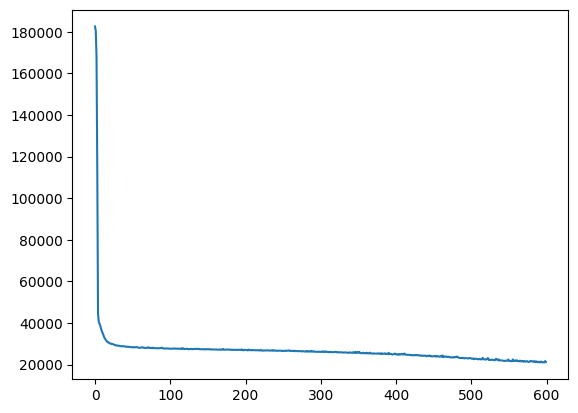

In [46]:
plt.plot(output.history["loss"])

In [47]:
model.evaluate(X_eval,Y_eval)

10/10 [==============================] - 0s 1ms/step - loss: 18954.0020


18954.001953125

In [48]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [49]:
# Save the entire model
model.save(r"/content/house prices.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
loaded_model = tf.keras.models.load_model(r"/content/house prices.h5")

In [52]:
data_test=pd.read_csv("test.csv")

In [53]:
le =LabelEncoder()
columns_to_encode =["Alley","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope",
           "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","MasVnrType","LotShape","ExterQual",
           "ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC",
           "CentralAir","Electrical","KitchenQual","Functional","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","SaleCondition","SaleType","FireplaceQu","PoolQC","Fence","MiscFeature",
                    "Exterior1st","Exterior2nd"]
for column in columns_to_encode:
    data_test[column] = le.fit_transform(data_test[column])

In [55]:
data_test.fillna(0,inplace=True)

In [56]:
## defining X_test
X_test=np.array(data_test[["OverallQual","YearBuilt","YearRemodAdd","ExterQual","BsmtQual","TotalBsmtSF",
                             "1stFlrSF","GrLivArea","FullBath","KitchenQual","TotRmsAbvGrd","GarageFinish","GarageCars",
                             "GarageArea"]])


In [57]:
predictions = loaded_model.predict(X_test)

46/46 [==============================] - 0s 992us/step


In [58]:
predictions

array([[130470.73],
       [160258.31],
       [187594.53],
       ...,
       [151740.98],
       [116010.62],
       [234129.14]], dtype=float32)